In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from store_sales.functions import prepare_data, encode_features, get_tree_based_predicts

At first let's load the data and check whether it's done correctly

In [169]:
data = pd.read_csv('../data/train.csv')
holidays_events_data = pd.read_csv('../data/holidays_events.csv')
oil_data = pd.read_csv('../data/oil.csv')
stores_data = pd.read_csv('../data/stores.csv')
transactions_data = pd.read_csv('../data/transactions.csv')

In [170]:
data.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [171]:
data.tail()

,id,date,store_nbr,family,sales,onpromotion
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8
3000887,3000887,2017-08-15,9,SEAFOOD,16.000,0


In [172]:
holidays_events_data.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [173]:
holidays_events_data.tail()

,date,type,locale,locale_name,description,transferred
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False
349,2017-12-26,Additional,National,Ecuador,Navidad+1,False


In [174]:
oil_data.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [175]:
oil_data.tail()

,date,dcoilwtico
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96
1217,2017-08-31,47.26


In [176]:
stores_data.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [177]:
stores_data.tail()

,store_nbr,city,state,type,cluster
49,50,Ambato,Tungurahua,A,14
50,51,Guayaquil,Guayas,A,17
51,52,Manta,Manabi,A,11
52,53,Manta,Manabi,D,13
53,54,El Carmen,Manabi,C,3


In [178]:
transactions_data.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [179]:
transactions_data.tail()

,date,store_nbr,transactions
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932
83487,2017-08-15,54,802


Now let's check whether there are some missing values of duplicated rows

In [180]:
data.isna().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [181]:
data.duplicated().sum()

0

In [182]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [183]:
holidays_events_data.isna().sum()

date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

In [184]:
holidays_events_data.duplicated().sum()

0

In [185]:
oil_data.isna().sum()

date           0
dcoilwtico    43
dtype: int64

In [186]:
oil_data.duplicated().sum()

0

In [187]:
len(data)

3000888

Now let's do data splitting before data preparation and EDA

In [188]:
X = data.drop(['sales'], axis=1)
y = data['sales']
X_train, X_valid_test, y_train, y_valid_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid_test, y_valid_test, shuffle=False, test_size=0.5, random_state=42)

In [189]:
len(X_train), len(X_valid), len(X_test)

(2400710, 300089, 300089)

In [190]:
X_train.tail()

,id,date,store_nbr,family,onpromotion
2400705,2400705,2016-09-12,19,LINGERIE,0
2400706,2400706,2016-09-12,19,"LIQUOR,WINE,BEER",0
2400707,2400707,2016-09-12,19,MAGAZINES,0
2400708,2400708,2016-09-12,19,MEATS,0
2400709,2400709,2016-09-12,19,PERSONAL CARE,8


In [191]:
X_valid.head()

,id,date,store_nbr,family,onpromotion
2400710,2400710,2016-09-12,19,PET SUPPLIES,0
2400711,2400711,2016-09-12,19,PLAYERS AND ELECTRONICS,0
2400712,2400712,2016-09-12,19,POULTRY,0
2400713,2400713,2016-09-12,19,PREPARED FOODS,1
2400714,2400714,2016-09-12,19,PRODUCE,1


In [192]:
X_valid.tail()

,id,date,store_nbr,family,onpromotion
2700794,2700794,2017-02-28,39,DAIRY,15
2700795,2700795,2017-02-28,39,DELI,7
2700796,2700796,2017-02-28,39,EGGS,1
2700797,2700797,2017-02-28,39,FROZEN FOODS,4
2700798,2700798,2017-02-28,39,GROCERY I,72


In [193]:
X_test.head()

,id,date,store_nbr,family,onpromotion
2700799,2700799,2017-02-28,39,GROCERY II,1
2700800,2700800,2017-02-28,39,HARDWARE,0
2700801,2700801,2017-02-28,39,HOME AND KITCHEN I,2
2700802,2700802,2017-02-28,39,HOME AND KITCHEN II,2
2700803,2700803,2017-02-28,39,HOME APPLIANCES,0


In [194]:
X_test.tail()

,id,date,store_nbr,family,onpromotion
3000883,3000883,2017-08-15,9,POULTRY,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,1
3000885,3000885,2017-08-15,9,PRODUCE,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,8
3000887,3000887,2017-08-15,9,SEAFOOD,0


In [195]:
train_data = pd.concat([X_train, y_train], axis=1)
train_data.head()

,id,date,store_nbr,family,onpromotion,sales
0,0,2013-01-01,1,AUTOMOTIVE,0,0.0
1,1,2013-01-01,1,BABY CARE,0,0.0
2,2,2013-01-01,1,BEAUTY,0,0.0
3,3,2013-01-01,1,BEVERAGES,0,0.0
4,4,2013-01-01,1,BOOKS,0,0.0


Now let's perform some necessary data preparation of the train part for EDA

In [196]:
train_data = prepare_data(train_data, holidays_events_data, oil_data, stores_data)

/Users/stanislavyatsevich/Desktop/Store_Sales/src/store_sales/functions.py:25: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [197]:
len(train_data)

2400710

In [198]:
train_data.head()

,date,store_number,item_family,items_on_promotion,item_sales,city,state,store_type,store_cluster,oil_price,day_type,holiday_status,holiday_location,holiday_description,is_holiday_transferred
id,,,,,,,,,,,,,,,
0,2013-01-01,1,AUTOMOTIVE,0,0.0,Quito,Pichincha,D,13,93.14,Holiday,National,Ecuador,Primer dia del ano,False
1,2013-01-01,1,BABY CARE,0,0.0,Quito,Pichincha,D,13,93.14,Holiday,National,Ecuador,Primer dia del ano,False
2,2013-01-01,1,BEAUTY,0,0.0,Quito,Pichincha,D,13,93.14,Holiday,National,Ecuador,Primer dia del ano,False
3,2013-01-01,1,BEVERAGES,0,0.0,Quito,Pichincha,D,13,93.14,Holiday,National,Ecuador,Primer dia del ano,False
4,2013-01-01,1,BOOKS,0,0.0,Quito,Pichincha,D,13,93.14,Holiday,National,Ecuador,Primer dia del ano,False


In [199]:
train_data.tail()

,date,store_number,item_family,items_on_promotion,item_sales,city,state,store_type,store_cluster,oil_price,day_type,holiday_status,holiday_location,holiday_description,is_holiday_transferred
id,,,,,,,,,,,,,,,
2400705,2016-09-12,19,LINGERIE,0,26.000,Guaranda,Bolivar,C,15,46.28,Not holiday,Not holiday,Not holiday,Not holiday,False
2400706,2016-09-12,19,"LIQUOR,WINE,BEER",0,9.000,Guaranda,Bolivar,C,15,46.28,Not holiday,Not holiday,Not holiday,Not holiday,False
2400707,2016-09-12,19,MAGAZINES,0,1.000,Guaranda,Bolivar,C,15,46.28,Not holiday,Not holiday,Not holiday,Not holiday,False
2400708,2016-09-12,19,MEATS,0,170.509,Guaranda,Bolivar,C,15,46.28,Not holiday,Not holiday,Not holiday,Not holiday,False
2400709,2016-09-12,19,PERSONAL CARE,8,181.000,Guaranda,Bolivar,C,15,46.28,Not holiday,Not holiday,Not holiday,Not holiday,False


In [200]:
train_data.index.value_counts()

id
0          1
1600485    1
1600469    1
1600470    1
1600471    1
          ..
800237     1
800238     1
800239     1
800240     1
2400709    1
Name: count, Length: 2400710, dtype: int64

We see that the data is prepared correctly and now let's search for some interesting patterns in it (i.e EDA)

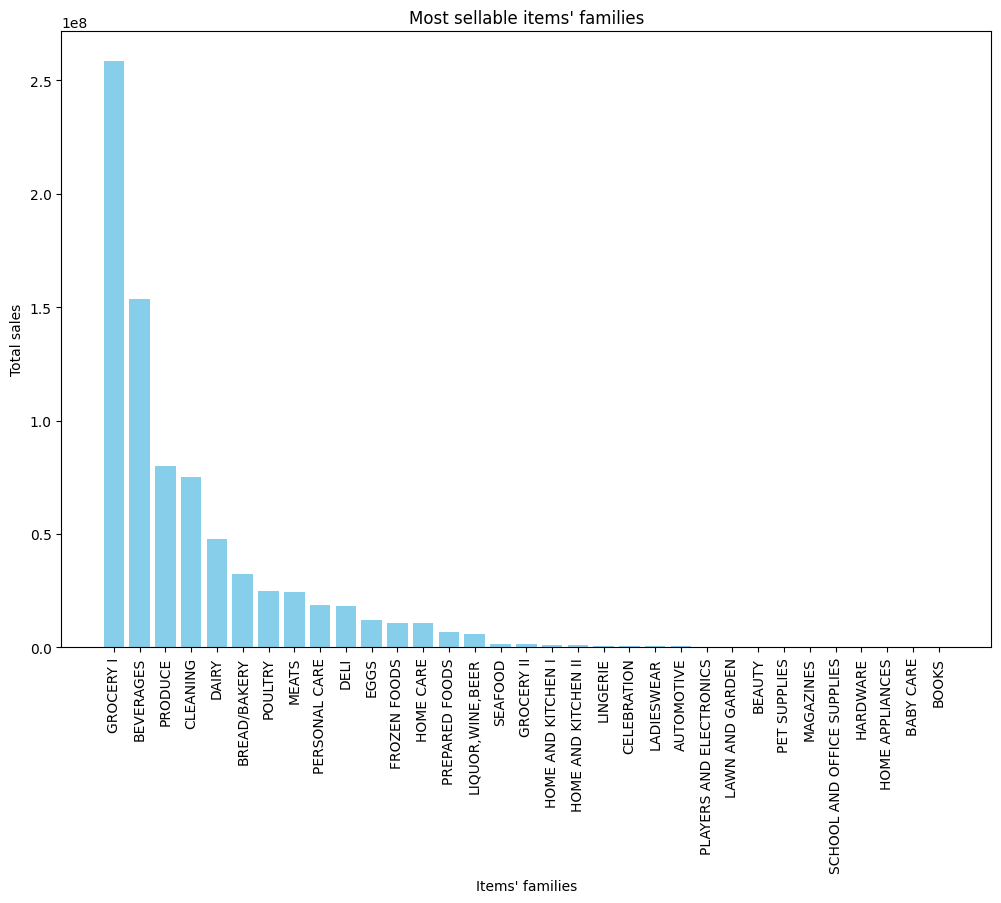

In [201]:
item_families_sales_summary = train_data.groupby('item_family')['item_sales'].sum().reset_index().sort_values(by='item_sales', ascending=False)

plt.figure(figsize=(12, 8))
plt.bar(item_families_sales_summary['item_family'], item_families_sales_summary['item_sales'], color='skyblue')
plt.xlabel("Items' families")
plt.ylabel("Total sales")
plt.title("Most sellable items' families")
plt.xticks(rotation=90)  
plt.show()

Grocery, Beverages, Produce, Cleaning and Dairy – top 5 most sellable items' families

In [202]:
store_sales_summary = train_data.groupby('store_number')['item_sales'].sum().reset_index()

fig = px.bar(store_sales_summary, x='store_number', y='item_sales', 
             labels={'store_number': 'Store number', 'item_sales': 'Total sales'},
             title="Stores' total sales")
fig.show()

There are 11 stores (3, 8, 11, 44, 45, 46, 47, 48, 49, 50, 51) with at least 20 million total sales. Let's check their locations

In [203]:
train_data[train_data['store_number'].isin([3, 8, 11, 44, 45, 46, 47, 48, 49, 50, 51])]['city'].value_counts()

city
Quito        355608
Cayambe       44484
Ambato        44451
Guayaquil     44451
Name: count, dtype: int64

Now let's see sales for every city

In [204]:
cities_sales_summary = train_data.groupby('city')['item_sales'].sum().reset_index()

fig = px.bar(cities_sales_summary, x='city', y='item_sales', 
             labels={'city': 'City', 'item_sales': 'Total sales'},
             title="Cities' total sales")
fig.show()

In [205]:
states_sales_summary = train_data.groupby('state')['item_sales'].sum().reset_index()

fig = px.bar(states_sales_summary, x='state', y='item_sales', 
             labels={'state': 'State', 'item_sales': 'Total sales'},
             title="States' total sales")
fig.show()

There are 2 cities (Quito and Guayaquil) which are by far the most popular ones with complete Quito's domination
Same for states, there are 2 main (Guayas, Pichincha) and 1 complete giant (Pichincha)

Now let's see total sales for every month

In [206]:
train_data['year_month'] = train_data['date'].dt.to_period('M')

monthly_sales_summary = train_data.groupby('year_month')['item_sales'].sum().reset_index()
monthly_sales_summary['year_month'] = monthly_sales_summary['year_month'].dt.to_timestamp()

fig = px.line(monthly_sales_summary, x='year_month', y='item_sales',
              labels={'year_month': 'Month', 'item_sales': 'Total sales'},
              title='Total sales per month')
fig.update_layout(xaxis=dict(tickformat='%B %Y'))
fig.show()

As you can see the sales are jumping very hard, difficult to see a distinct trend or seasonality except for the December's prices rising

Now let's see the oil prices' dependency on time

In [207]:
train_data['year_month'] = pd.to_datetime(train_data['date']).dt.to_period('M')

monthly_oil_price_summary = train_data.groupby('year_month')['oil_price'].mean().reset_index()
monthly_oil_price_summary['year_month'] = monthly_oil_price_summary['year_month'].dt.to_timestamp()

fig = px.line(monthly_oil_price_summary, x='year_month', y='oil_price',
              labels={'year_month': 'Month', 'oil_price': 'Mean oil price'},
              title='Mean oil prices per month')

fig.update_layout(xaxis=dict(tickformat='%B %Y'))
fig.show()

There are obviously 2 double price losses within just 6 months (July 2014 - January 2015 and June 2015 - January 2016)  

In [208]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2400710 entries, 0 to 2400709
Data columns (total 16 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   date                    datetime64[ns]
 1   store_number            int64         
 2   item_family             object        
 3   items_on_promotion      int64         
 4   item_sales              float64       
 5   city                    object        
 6   state                   object        
 7   store_type              object        
 8   store_cluster           int64         
 9   oil_price               float64       
 10  day_type                object        
 11  holiday_status          object        
 12  holiday_location        object        
 13  holiday_description     object        
 14  is_holiday_transferred  bool          
 15  year_month              period[M]     
dtypes: bool(1), datetime64[ns](1), float64(2), int64(3), object(8), period[M](1)
memory usage: 295.

Now let's see mean sales for all day types

In [211]:
day_types_sales_summary = train_data.groupby('day_type')['item_sales'].mean().reset_index()

fig = px.bar(day_types_sales_summary, x='day_type', y='item_sales', 
             labels={'day_type': 'Day type', 'item_sales': 'Total sales'},
             title="Day types' average sales")
fig.show()

It's visible that average sales are slightly higher on "special" days (Additional, Bridge, Transfer holidays or days with events)

#Check sales depending on store_type, store_cluster, holiday_status, holiday_location, holiday_description 